In [1]:
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install mpld3
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


[notice] A new release of pip is available: 23.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
#first, a list with the more relevant names of the columns is createad
infocol = ["Territory", "Data type", "Gender", "Highest level of education attained", "Citizenship", "TIME", "Value"]
#then, the csv files are read and we use the list created before to only have information about those
df1 = (pd.read_csv("../_datasets/ISTAT_Unemployment_rate_region_2018_2022_.csv", sep=","))[infocol]
df2 = (pd.read_csv("../_datasets/ISTAT_Activity_Rate_Region_2018-2022.csv", sep=","))[infocol]

In [4]:
#here a function is defined in order to delete rows that might not interest us
def delete_row(dataframe, column_name, value_to_delete):
    filtered_dataframe = dataframe[dataframe[column_name] != value_to_delete]

    return filtered_dataframe

In [5]:
#sometimes the year value might include information about quarters, so this is another function to take only the values with 4 digits
def y_val(dataframe):
    
    dataframe['TIME'] = dataframe['TIME'].astype('str')
    mask = (dataframe['TIME'].str.len() == 4)
    dataframe= dataframe.loc[mask]
    
    return dataframe

In [6]:
#applying the year function for the first dataframe
df1 = y_val(df1)

In [7]:
df1

,Territory,Data type,Gender,Highest level of education attained,Citizenship,TIME,Value
0,Italy,unemployment rate,males,upper and post secondary,italian,2018,8.646761
5,Italy,unemployment rate,males,upper and post secondary,italian,2019,7.928640
10,Italy,unemployment rate,males,upper and post secondary,italian,2020,7.425268
15,Italy,unemployment rate,males,upper and post secondary,italian,2021,7.469522
16,Italy,unemployment rate,males,upper and post secondary,italian,2022,6.137924
...,...,...,...,...,...,...,...
11672,Nord-est,unemployment rate,males,total,foreign,2018,9.628649
11677,Nord-est,unemployment rate,males,total,foreign,2019,9.437797
11682,Nord-est,unemployment rate,males,total,foreign,2020,8.935428
11687,Nord-est,unemployment rate,males,total,foreign,2021,6.870910


In [8]:
#applying the year function for the second dataframe
df2 = y_val(df2)

In [9]:
df2

,Territory,Data type,Gender,Highest level of education attained,Citizenship,TIME,Value
0,Nord,activity rate,males,upper and post secondary,italian,2018,84.489730
1,Nord,activity rate,males,upper and post secondary,italian,2019,84.137185
2,Nord,activity rate,males,upper and post secondary,italian,2020,82.260744
3,Nord,activity rate,males,upper and post secondary,italian,2021,82.684206
4,Nord,activity rate,males,upper and post secondary,italian,2022,83.823293
...,...,...,...,...,...,...,...
9875,Mezzogiorno,activity rate,total,upper and post secondary,total,2018,62.224117
9880,Mezzogiorno,activity rate,total,upper and post secondary,total,2019,62.466245
9885,Mezzogiorno,activity rate,total,upper and post secondary,total,2020,59.330492
9890,Mezzogiorno,activity rate,total,upper and post secondary,total,2021,61.167564


In [10]:
#applying the deletion function to take out rows we're not interested
df2 = delete_row(df2, "Gender", "females")
df2 = delete_row(df2, "Gender", "males")
df2 = delete_row(df2, "Citizenship", "total")
df1 = delete_row(df1, "Gender", "females")
df1 = delete_row(df1, "Gender", "males")
df1 = delete_row(df1, "Citizenship", "total")

In [11]:
#Here we're excluding Italy because we want information only about the regions
df2 = delete_row(df2, "Territory", "Italy")
df1 = delete_row(df1, "Territory", "Italy")

In [12]:
df1

,Territory,Data type,Gender,Highest level of education attained,Citizenship,TIME,Value
275,Nord,unemployment rate,total,upper and post secondary,italian,2018,5.607093
280,Nord,unemployment rate,total,upper and post secondary,italian,2019,4.948992
285,Nord,unemployment rate,total,upper and post secondary,italian,2020,5.178384
290,Nord,unemployment rate,total,upper and post secondary,italian,2021,5.036280
291,Nord,unemployment rate,total,upper and post secondary,italian,2022,4.316984
...,...,...,...,...,...,...,...
11497,Centro (I),unemployment rate,total,"no educational degree, primary and lower secon...",italian,2018,11.549672
11502,Centro (I),unemployment rate,total,"no educational degree, primary and lower secon...",italian,2019,9.998387
11507,Centro (I),unemployment rate,total,"no educational degree, primary and lower secon...",italian,2020,10.639449
11512,Centro (I),unemployment rate,total,"no educational degree, primary and lower secon...",italian,2021,11.358337


In [13]:
#creating a pivot table to have the information of the educational leval in other columns and not rows
unemployment_df = df1.pivot_table(index=['Territory', 'Citizenship', 'TIME'], columns='Highest level of education attained', values='Value', aggfunc='mean').reset_index()

In [14]:
#renaming the new columns with the unemployment info for each educational level
unemployment_df.columns.name = None  # Remove the column name
unemployment_df = unemployment_df.rename(columns={'no educational degree, primary and lower secondary school certificate': 'UNEMP_ED_1', 'upper and post secondary': 'UNEMP_ED_2', 'tertiary (university, doctoral and specialization courses)':'UNEMP_ED_3', 'TIME':'Year'})

In [15]:
unemployment_df

,Territory,Citizenship,Year,UNEMP_ED_1,UNEMP_ED_3,total,UNEMP_ED_2
0,Centro (I),foreign,2018,15.155627,10.804081,14.453227,14.836710
1,Centro (I),foreign,2019,13.568437,11.434287,14.846058,17.514611
2,Centro (I),foreign,2020,13.153746,8.624535,12.778525,13.542032
3,Centro (I),foreign,2021,13.241853,18.102600,15.194500,16.586291
4,Centro (I),foreign,2022,12.723967,12.505329,12.980380,13.377200
5,Centro (I),italian,2018,11.356605,4.986898,8.676383,9.377720
6,Centro (I),italian,2019,9.827092,5.102061,7.718597,8.193194
7,Centro (I),italian,2020,10.372889,5.024784,7.629936,7.821124
8,Centro (I),italian,2021,11.100709,4.150024,7.694963,8.114135
9,Centro (I),italian,2022,8.462975,3.369947,6.059123,6.500167


In [71]:
#f_unemp = unemployment_df.loc[unemployment_df['Citizenship'] == 'foreign']
#f_unemp

In [30]:
#result = df1.loc[df1['Citizenship'] == 'foreign']
#result

In [17]:
#creating a pivot table to have the information of the educational leval in other columns and not rows
activity_df = df2.pivot_table(index=['Territory', 'Citizenship', 'TIME'], columns='Highest level of education attained', values='Value', aggfunc='mean').reset_index()

In [18]:
#renaming the new columns with the unemployment info for each educational level
activity_df.columns.name = None  # Remove the column name
activity_df = activity_df.rename(columns={'no educational degree, primary and lower secondary school certificate': 'ACT_ED_1', 'upper and post secondary': 'ACT_ED_2', 'tertiary (university, doctoral and specialization courses)':'ACT_ED_3', 'TIME':'Year'})

In [19]:
activity_df

,Territory,Citizenship,Year,ACT_ED_1,ACT_ED_3,total,ACT_ED_2
0,Centro (I),foreign,2018,70.985618,77.124190,73.572533,75.708602
1,Centro (I),foreign,2019,70.615605,75.937080,73.539525,76.776958
2,Centro (I),foreign,2020,66.399470,68.671068,68.004095,70.110227
3,Centro (I),foreign,2021,66.442788,71.376057,69.614376,73.098578
4,Centro (I),foreign,2022,68.150298,74.444015,70.789589,72.925446
5,Centro (I),italian,2018,52.889158,83.546888,67.794273,71.418533
6,Centro (I),italian,2019,52.150330,83.869037,67.642946,71.001206
7,Centro (I),italian,2020,49.991570,82.418189,66.140077,69.852723
8,Centro (I),italian,2021,50.522212,83.899395,66.848048,70.399843
9,Centro (I),italian,2022,51.609045,83.923159,67.995490,71.828835


In [20]:
#after making sure there's mostly numerical numbers in both dataframes we make the merge
DF5 = pd.merge(unemployment_df, activity_df, on=['Territory', 'Citizenship', 'Year'], how='outer')

Merge Unemployment rate x Activity rage (by educational level)

In [21]:
DF5

,Territory,Citizenship,Year,UNEMP_ED_1,UNEMP_ED_3,total_x,UNEMP_ED_2,ACT_ED_1,ACT_ED_3,total_y,ACT_ED_2
0,Centro (I),foreign,2018,15.155627,10.804081,14.453227,14.836710,70.985618,77.124190,73.572533,75.708602
1,Centro (I),foreign,2019,13.568437,11.434287,14.846058,17.514611,70.615605,75.937080,73.539525,76.776958
2,Centro (I),foreign,2020,13.153746,8.624535,12.778525,13.542032,66.399470,68.671068,68.004095,70.110227
3,Centro (I),foreign,2021,13.241853,18.102600,15.194500,16.586291,66.442788,71.376057,69.614376,73.098578
4,Centro (I),foreign,2022,12.723967,12.505329,12.980380,13.377200,68.150298,74.444015,70.789589,72.925446
5,Centro (I),italian,2018,11.356605,4.986898,8.676383,9.377720,52.889158,83.546888,67.794273,71.418533
6,Centro (I),italian,2019,9.827092,5.102061,7.718597,8.193194,52.150330,83.869037,67.642946,71.001206
7,Centro (I),italian,2020,10.372889,5.024784,7.629936,7.821124,49.991570,82.418189,66.140077,69.852723
8,Centro (I),italian,2021,11.100709,4.150024,7.694963,8.114135,50.522212,83.899395,66.848048,70.399843
9,Centro (I),italian,2022,8.462975,3.369947,6.059123,6.500167,51.609045,83.923159,67.995490,71.828835


In [78]:
#result = DF5.loc[DF5['Citizenship'] == 'foreign']
#result.to_csv("../_datasets/F_MASHUP.csv")

In [68]:
#defining a list with the name of the most relevant columns
infocols = ["LOCATION", "MEASURE", "TIME", "Value"]
df3 = (pd.read_csv("../_datasets/OECD_Avarage_Wage.csv", sep=","))[infocols]

In [78]:
#selecting only information about Italy and deleting decimal numbers from value
df3 = df3[df3["LOCATION"]=="ITA"]
df3['Value'] = df3['Value'].astype(str)
df3['Value'] = df3['Value'].str.replace(r'\..*$', '', regex=True)
df3['Value'] = df3['Value'].astype(int)
df3

,LOCATION,MEASURE,TIME,Value
60,ITA,USD,2018,46230
61,ITA,USD,2019,46460
62,ITA,USD,2020,44246
63,ITA,USD,2021,45960
64,ITA,USD,2022,44893


In [76]:
df4 = (pd.read_csv("../_datasets/ISTAT_Unemployment_rate_region_2018_2022_.csv", sep=","))[infocol]
df4 = df4[df4["Citizenship"]=="total"]
df4 = df4[df4["Gender"]=="total"]
df4 = df4[df4["Highest level of education attained"]=="total"]
df4 = df4[df4["Territory"]=="Italy"]
df4 = y_val(df4)
tot_unemp = df4.head(5)

In [54]:
tot_unemp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 1500 to 1516
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Territory                            5 non-null      object 
 1   Data type                            5 non-null      object 
 2   Gender                               5 non-null      object 
 3   Highest level of education attained  5 non-null      object 
 4   Citizenship                          5 non-null      object 
 5   TIME                                 5 non-null      object 
 6   Value                                5 non-null      float64
dtypes: float64(1), object(6)
memory usage: 492.0+ bytes


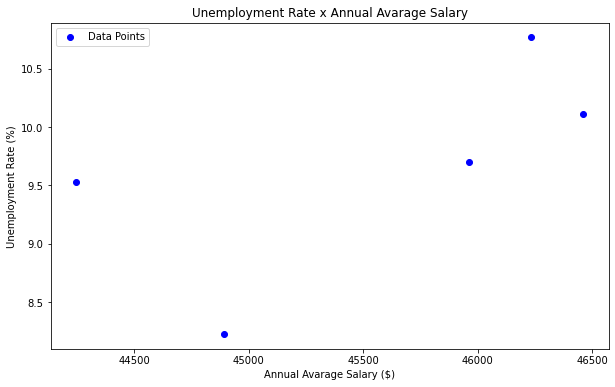

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatterplot using Seaborn
plt.figure(figsize=(10, 6))
plt.scatter(x=df3['Value'], y=tot_unemp['Value'], label='Data Points', color='blue', marker='o')

# Add labels and a title
plt.xlabel('Annual Avarage Salary ($)')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate x Annual Avarage Salary')

# Show the plot
plt.legend()
plt.show()
